In [10]:
import torch
import numpy as np

from matplotlib import pyplot as plt
from gaussians import Gaussian
from ubvi import UBVI
from bbvi import BBVI

In [11]:
example_log_pdf_0 = lambda x: -((x - 1) ** 2).sum(dim=-1) / 2

In [12]:
test = BBVI(example_log_pdf_0, Gaussian(1), num_opt_steps=5000, n_samples=1000, n_init=500, lmb=lambda x: 10)

In [13]:
test.build(20)

Initializing component 1... 
          Iteration           |          Best param          |        Best objective        
              0               | tensor([191.2407,   0.0000]) |      tensor(18078.8613)      
             499              |   tensor([1.2154, 0.0000])   |       tensor(-13.6925)       
Initialization of component 1 complete, x0 = tensor([1.2154, 0.0000])
Optimizing component 1... 
Optimization of component 1 complete
Updating weights...
Weight update complete...
Component 1:
KL Divergence: tensor(2.3030, grad_fn=<AddBackward0>)
Params:{'mus': tensor([[0.9693]], grad_fn=<SliceBackward>), 'sigmas': tensor([[10.0099]], grad_fn=<ExpBackward>)}
Weights: tensor([1.])
Initializing component 2... 
          Iteration           |          Best param          |        Best objective        
              0               |tensor([20.2016,  1.0964], grad_fn=<CatBackward>)|tensor(147.4725, grad_fn=<SubBackward0>)
             499              |tensor([1.1280, 2.3883], grad_fn=<

             499              |tensor([1.4906, 1.8114], grad_fn=<CatBackward>)|tensor(-22.5392, grad_fn=<SubBackward0>)
Initialization of component 10 complete, x0 = tensor([1.4906, 1.8114], grad_fn=<CatBackward>)
Optimizing component 10... 
Optimization of component 10 complete
Updating weights...
Weight update complete...
Component 10:
KL Divergence: tensor(2.3958, grad_fn=<AddBackward0>)
Params:{'mus': tensor([[0.9693],
        [0.9778],
        [0.9917],
        [1.0174],
        [1.0205],
        [0.9748],
        [1.0224],
        [1.0122],
        [0.9959],
        [1.0105]], grad_fn=<SliceBackward>), 'sigmas': tensor([[10.0099],
        [11.1812],
        [11.2070],
        [11.0724],
        [11.1052],
        [11.3737],
        [11.0452],
        [11.0205],
        [10.5852],
        [11.1651]], grad_fn=<ExpBackward>)}
Weights: tensor([0.6121, 0.0433, 0.0437, 0.0480, 0.0357, 0.0179, 0.0400, 0.0564, 0.0637,
        0.0393])
Initializing component 11... 
          Iteration    

Weight update complete...
Component 16:
KL Divergence: tensor(2.2785, grad_fn=<AddBackward0>)
Params:{'mus': tensor([[0.9693],
        [0.9778],
        [0.9917],
        [1.0174],
        [1.0205],
        [0.9748],
        [1.0224],
        [1.0122],
        [0.9959],
        [1.0105],
        [0.9889],
        [1.0204],
        [0.9874],
        [1.0104],
        [1.0045],
        [1.0140]], grad_fn=<SliceBackward>), 'sigmas': tensor([[10.0099],
        [11.1812],
        [11.2070],
        [11.0724],
        [11.1052],
        [11.3737],
        [11.0452],
        [11.0205],
        [10.5852],
        [11.1651],
        [11.1896],
        [10.8262],
        [11.1467],
        [11.1964],
        [10.8763],
        [11.2493]], grad_fn=<ExpBackward>)}
Weights: tensor([0.9956, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0044,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
Initializing component 17... 
          Iteration           |          Best param  

{'mus': tensor([[0.9693],
         [0.9778],
         [0.9917],
         [1.0174],
         [1.0205],
         [0.9748],
         [1.0224],
         [1.0122],
         [0.9959],
         [1.0105],
         [0.9889],
         [1.0204],
         [0.9874],
         [1.0104],
         [1.0045],
         [1.0140],
         [1.0172],
         [0.9997],
         [1.0316],
         [1.0110]], grad_fn=<SliceBackward>), 'sigmas': tensor([[10.0099],
         [11.1812],
         [11.2070],
         [11.0724],
         [11.1052],
         [11.3737],
         [11.0452],
         [11.0205],
         [10.5852],
         [11.1651],
         [11.1896],
         [10.8262],
         [11.1467],
         [11.1964],
         [10.8763],
         [11.2493],
         [11.2820],
         [10.9273],
         [11.2336],
         [10.9582]], grad_fn=<ExpBackward>), 'weights': tensor([0.6337, 0.0216, 0.0194, 0.0188, 0.0207, 0.0169, 0.0198, 0.0182, 0.0191,
         0.0211, 0.0199, 0.0178, 0.0200, 0.0217, 0.0225, 0.01

In [55]:
def sampler(test,n_samples=100000):
    mus = test._get_mixture()['mus']
    sigmas = test._get_mixture()['sigmas']
    weights = test._get_mixture()['weights']
    samples=[]
    for _ in range(n_samples):
        i = np.random.multinomial(1, weights).argmax()
        samples.append(np.random.normal(mus[i,0].detach().numpy(),sigmas[i,0].detach().numpy(),1))#[0]
    return np.array(samples)[:,0]

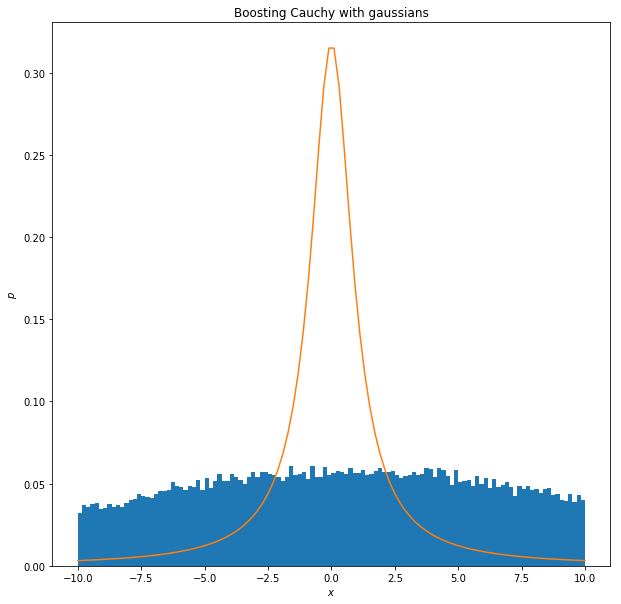

In [64]:
#samples = np.random.normal(mus[0,0].detach().numpy(),sigmas[0,0].detach().numpy(),100000)
plt.figure(figsize=(10, 10))

plt.hist(samples, density=True, bins=120, range=[-10, 10])

grid = np.linspace(-10, 10, 100)
plt.plot(grid, (1 / np.pi) / (1 + grid ** 2))

plt.title('Boosting Cauchy with gaussians')
plt.ylabel(r'$p$')
plt.xlabel(r'$x$')
plt.savefig('test.jpg')
plt.show()